In [1]:
%matplotlib inline
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import katarchive
#import katdal as katfile
#import katfile
import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [4]:
def findproj(text):
    chx=text.find('--pro')  # matches 'project-id and proposal-id'
    if chx >0  :
        pr2=text[chx+13:chx+40].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        found='Unknown'
    return found


### Start July 2015, end Feb 2016

In [5]:
begindate="01/07/2015"
#projectname="20130905MS-01"
projectname="20141111-CR01"
#projectname="20150317AR-01"
lastday="29/02/2016" # it wsas a leap year

In [6]:
#today=datetime.datetime.today()
#print today
#end=today.strftime(format="%d/%m/%Y")


In [7]:
#print katarchive.search_archive(startdate=begindate,enddate=end)


In [8]:
f = katarchive.search_archive(startdate=begindate,enddate=lastday)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2015-06-30T22:00:00Z TO 2016-02-29T21:59:59Z]
Returning 2576 results


In [9]:
print 'First file in run: ' , start.isoformat()
print 'Last file in run: ' , end.isoformat()

First file in run:  2015-07-01T02:34:30
Last file in run:  2016-02-29T22:44:09


In [10]:
total=0.0
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    #print p
    if  projectname in p:  
        #print "Found",p,"======================="
        total=total+fi.metadata.Duration
        print p,fi.metadata.Duration, fi.metadata.Description      
        
print "Total",total/3600., "Hours"


Total 0.0 Hours


In [11]:
print txts

/home/kat/scripts/observation/auto_attenuate.py --proposal-id=COMM_Atten --program-block-id=00b60000000 --sb-id-code=20150701-0001 --description= AutoAttenuation for 00b60000000  --observer=operator


Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [12]:
projectname="20141111CR-01"

In [13]:
total=0.0
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    #print p
    if  projectname in p:  
        #print "Found",p,"======================="
        total=total+fi.metadata.Duration
        print p,fi.metadata.Duration, fi.metadata.Description      
        
print "Total",total/3600., "Hours"


Total 0.0 Hours


In [14]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [15]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  38.0 %


In [16]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

COMM_Delay_TF 109.09
20150811RA-01 38.22
COMM_Tipping_NO 29.09
20150317AR-01 8.54
20150421TF-01 74.97
Unknown 125.43
ck-id320ob282166303 6.17
20130905MS-01 4.0
COMM_RFI_SP 378.29
20140922SP-01 1.04
20150821LR-01 47.7
COMM_Holography_ 2.92
COMM_Bandpass_TF 32.19
20141014LR-01 37.9
20141002MB-01 22.2
20130822NO-01 82.92
20150619TF-01 81.27
20140624CC-01 14.75
20150210SS-01 179.13
COMM_Image_NO 224.88
20150922SG-01 61.55
20150811-RA 5.76
20150825LR-01 22.3
20141219SS-01 38.24
COMM_Beamform_TF 6.66
COMM_Point_LM 171.43
20140603MC-01 111.57
20141111IM-01 71.21
COMMTEST 17.1
20150217RT-01 20.7
20140527TF-01 98.33
20150821SP-01 7.79
20140729RT-01 36.73
20150624TF-01 24.47
ck-id322ob525055036 15.58
COMM_Polar_LR 22.18
20131211NO-01 10.03
20141125NO-01 2.18


In [17]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20130822NO-01     82.9 4
20130905MS-01      4.0 4
20131211NO-01     10.0 3
20140527TF-01     98.3 4
20140603MC-01    111.6 4
20140624CC-01     14.8 4
20140729RT-01     36.7 4
20140922SP-01      1.0 4
20141002MB-01     22.2 4
20141014LR-01     37.9 4
20141111IM-01     71.2 4
20141125NO-01      2.2 3
20141219SS-01     38.2 3
20150210SS-01    179.1 4
20150217RT-01     20.7 4
20150317AR-01      8.5 4
20150421TF-01     75.0 4
20150619TF-01     81.3 4
20150624TF-01     24.5 4
20150811-RA        5.8 4
20150811RA-01     38.2 4
20150821LR-01     47.7 4
20150821SP-01      7.8 4
20150825LR-01     22.3 3
20150922SG-01     61.5 4
COMMTEST          17.1 4
COMM_Bandpass_TF  32.2 4
COMM_Beamform_TF   6.7 4
COMM_Delay_TF    109.1 4
COMM_Holography_   2.9 4
COMM_Image_NO    224.9 4
COMM_Point_LM    171.4 4
COMM_Polar_LR     22.2 3
COMM_RFI_SP      378.3 4
COMM_Tipping_NO   29.1 4
Unknown          125.4 4
ck-id320ob282166303   6.2 4
ck-id322ob525055036  15.6 3


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

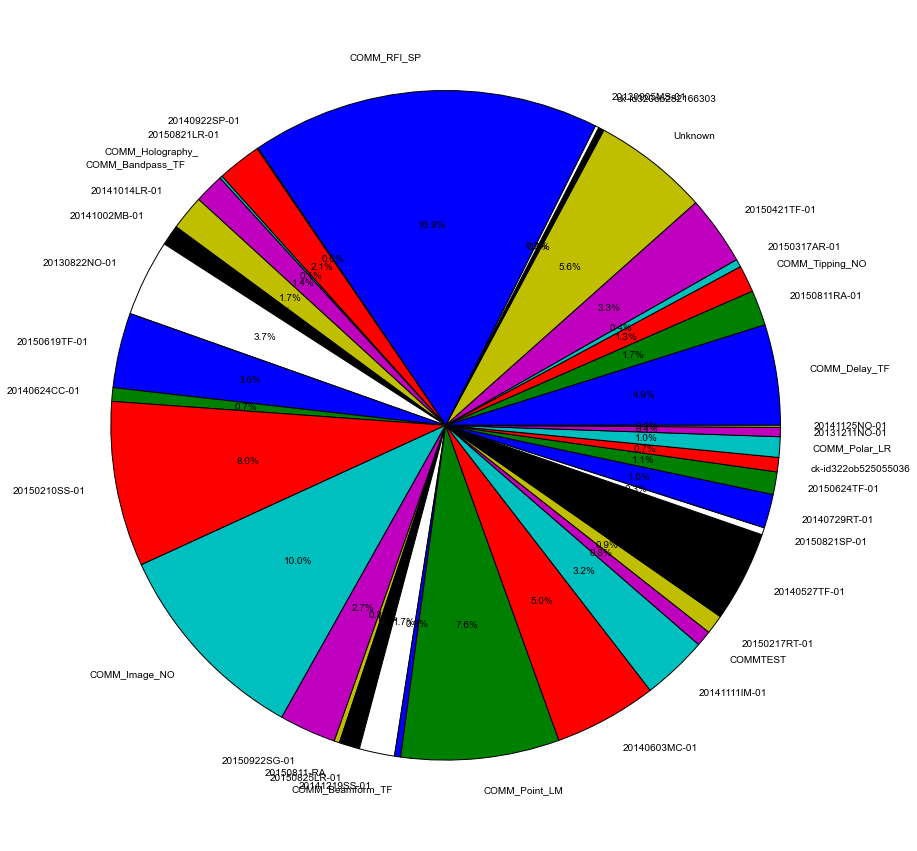

In [18]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,autopct='%1.1f%%');

In [19]:
plt.show()

In [20]:
len(antsd)

533

In [21]:
allobs=0
numberofn=[]
for nant in range(1,8):                 # from 1 to 7 antennas
    print nant, antsd.count(nant)       # how many have that count
    numberofn.append(antsd.count(nant))
    allobs=allobs+antsd.count(nant)
print numberofn
print nant
            

1 0
2 2
3 111
4 192
5 158
6 63
7 7
[0, 2, 111, 192, 158, 63, 7]
7


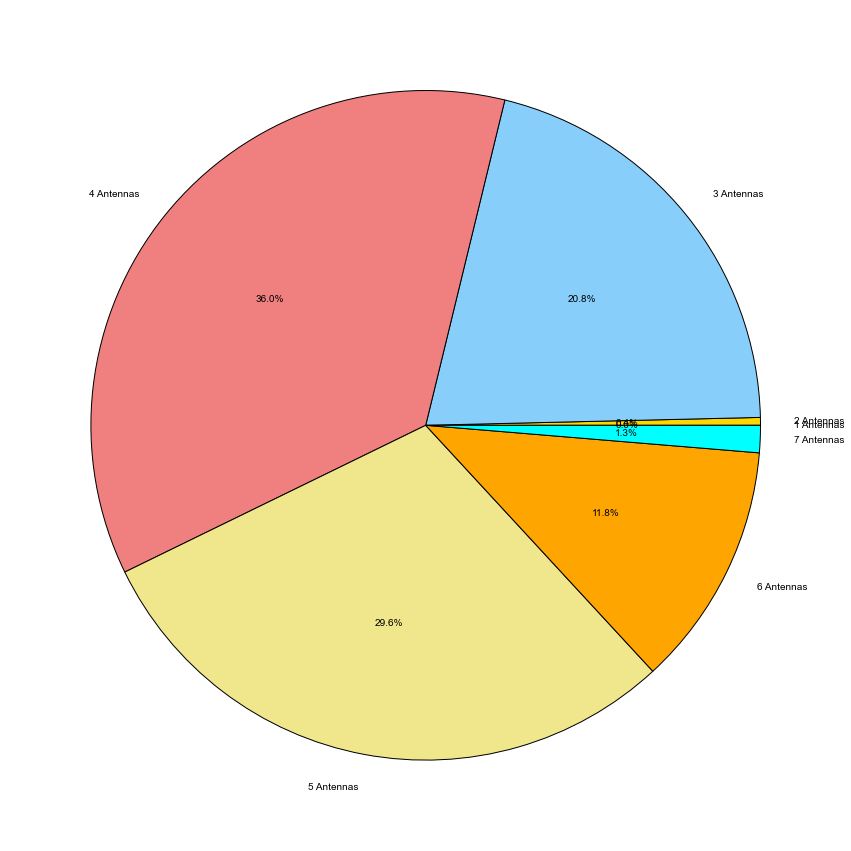

In [22]:
labs=[]
for n in range(7):
    labs.append(str(n+1)+" Antennas")

#cmap = plt.cm.prism
#colors = cmap(np.linspace(0., 1., 7))
colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','orange','cyan']
y=np.array(numberofn)
plt.figure(figsize=(15,15))
plt.pie(y,labels=labs,colors=colors, autopct='%1.1f%%')
plt.show()